We import our modules, as usual...

In addition to `pandas` and `numpy` (data manipulation and shenanigans), we use `tweepy`, a Twitter API wrapper library.

In [1]:
import tweepy
import pandas as pd
import numpy as np

The cell below is what your **must not** share with people

In [2]:
# Consume:
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''

# Access:
ACCESS_TOKEN  = ''
ACCESS_SECRET = 'lBpmx0cyGDBZDHuvhuwhag92oPquiseX3li1RWIQJoyon'

Copy and paste the code below. It is a function (`def functionName():`, remember?) that takes the variable set above and authenticates you with Twitter. No need to learn or understand that code, that's magic.

Note that the function `returns` a thing called `api`. We'll use this as a base for our work.

In [3]:
# API stup
# Utility function to setup the Twitter's API
# with our access keys provided.
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

# Let the scraping begin

In [13]:
# We create an "extractor" from our function above:
extractor = twitter_setup()

# We create a list of tweets as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted:", len(tweets))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()
    
# note that if we had written 
# for tweet in tweets:
# we would have printed all 200 of them

Number of tweets extracted: 200
5 recent tweets:

As long as we open our eyes to God’s grace - and open our hearts to God’s love - then America will forever be the l… https://t.co/wGUIaD1JX6

I will be meeting with Henry Kissinger at 1:45pm. Will be discussing North Korea, China and the Middle East.

Our founders invoked our Creator four times in the Declaration of Independence. Our currency declares “IN GOD WE TR… https://t.co/q8ib233y1M

Will be heading over shortly to make remarks at The National Prayer Breakfast in Washington. Great religious and po… https://t.co/bEReTLNLo4

The Budget Agreement today is so important for our great Military. It ends the dangerous sequester and gives Secret… https://t.co/VRkKsNDZGC



We now have a variable `tweets` that contains 200 elements (try running `print(len(tweets))`.

Let's throw all of these inside a very handy panda dataframe:

In [24]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(
    data=[tweet.text for tweet in tweets],   # that's an inline for loop, wow
    columns=['Tweets']
)

# We display the first 10 elements of the dataframe:
# note that display() is a nicer way to print(), but only works in jupyter notebooks
display(data.head(10))

,Tweets
0,As long as we open our eyes to God’s grace - a...
1,I will be meeting with Henry Kissinger at 1:45...
2,Our founders invoked our Creator four times in...
3,Will be heading over shortly to make remarks a...
4,The Budget Agreement today is so important for...
5,Congratulations to the Republic of Korea on wh...
6,Best wishes to the Republic of Korea on hostin...
7,NEW FBI TEXTS ARE BOMBSHELLS!
8,"In the “old days,” when good news was reported..."
9,Congratulations @ElonMusk and @SpaceX on the s...


In [25]:
# We add relevant data to our data frame
data['len']  = np.array([len(tweet.text) for tweet in tweets])
# data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,Date,Source,Likes,RTs
0,As long as we open our eyes to God’s grace - a...,140,2018-02-08 20:10:58,Twitter for iPad,12872,3990
1,I will be meeting with Henry Kissinger at 1:45...,108,2018-02-08 18:44:00,Twitter for iPhone,27288,5632
2,Our founders invoked our Creator four times in...,140,2018-02-08 17:13:13,Twitter for iPad,45152,13373
3,Will be heading over shortly to make remarks a...,140,2018-02-08 11:08:39,Twitter for iPhone,80936,14543
4,The Budget Agreement today is so important for...,140,2018-02-07 22:36:15,Twitter for iPhone,95113,20978
5,Congratulations to the Republic of Korea on wh...,140,2018-02-07 22:13:16,Media Studio,58554,11408
6,Best wishes to the Republic of Korea on hostin...,140,2018-02-07 18:01:05,Media Studio,57067,11571
7,NEW FBI TEXTS ARE BOMBSHELLS!,29,2018-02-07 16:10:00,Twitter for iPhone,127303,38010
8,"In the “old days,” when good news was reported...",140,2018-02-07 14:59:49,Twitter for iPhone,100844,20404
9,Congratulations @ElonMusk and @SpaceX on the s...,140,2018-02-07 03:05:45,Twitter for iPhone,157554,30313


The above way of building our data frame is strictly equivalent to what is below.
It is, however, more elegant, shorter, and makes better use of handy methods, eg `np.array`

In [29]:
data_second = {}        # empty store that we'll populate last
texts = []       # tweet copy
lens = []
# (...)

# for each tweet I populate my lists with the data I want...
for tweet in tweets:
    texts.append(tweet.text)
    lens.append(len(tweet.text))
    
# then I add key: value pais as columns one by one...
data_second['text'] = texts
# how would I add all my lengths to my data object?

# and finally I get my data frame
display(pd.DataFrame(data=data_second).head(5))

,text
0,As long as we open our eyes to God’s grace - a...
1,I will be meeting with Henry Kissinger at 1:45...
2,Our founders invoked our Creator four times in...
3,Will be heading over shortly to make remarks a...
4,The Budget Agreement today is so important for...


### back to business

In [33]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])  # print(fav_max)
rt_max  = np.max(data['RTs'])    # print(rt_max)

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: ", data['Tweets'][fav])
print("Number of likes: ", fav_max)

# Max RTs:
print("The tweet with more retweets is: ", data['Tweets'][rt])
print("Number of retweets: {}", rt_max)


The tweet with more likes is:  Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of likes:  240428
The tweet with more retweets is:  Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of retweets: {} 64275


# some vizzz

In [10]:
# the modules we need for this: 
# pip3 install matplotlib seaborn
# for plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### number of favs over time

we only need to plot one column of the dataframe, so we can use a pandas [Series](https://stackoverflow.com/questions/26047209/what-is-the-difference-between-a-pandas-series-and-a-single-column-dataframe)

> the Series is the datastructure for a single column of a DataFrame, not only conceptually, but literally i.e. the data in a DataFrame is actually stored in memory as a collection of Series. 

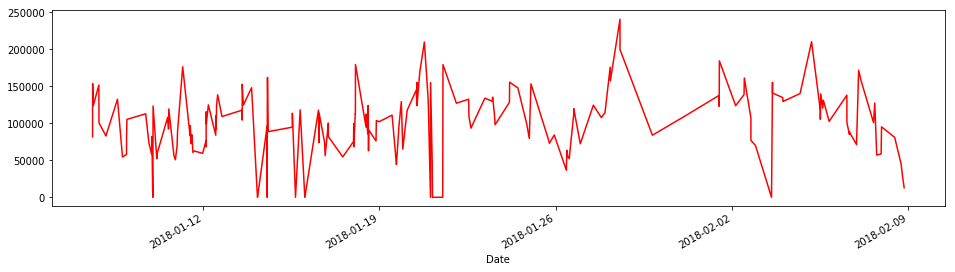

In [37]:
number_of_favs = pd.Series(
    data=data['Likes'].values, 
    index=data['Date'])

number_of_favs.plot(figsize=(16,4), color='r');


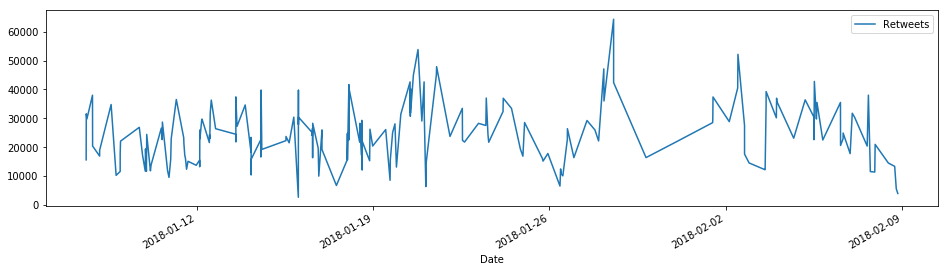

In [38]:
number_of_rts = pd.Series(data=data['RTs'].values, index=data['Date'])
number_of_rts.plot(figsize=(16,4), label="Retweets", legend=True);

In [14]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for iPad
* Media Studio
* Twitter Web Client


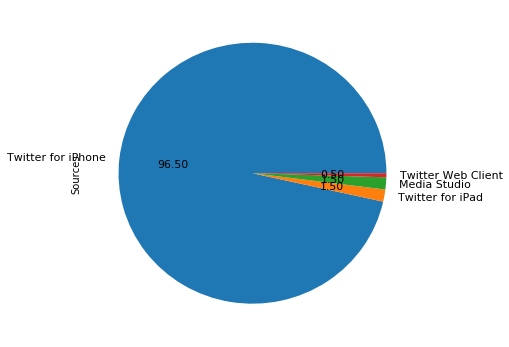

In [15]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));